In [40]:
import timm
import tome
from torchvision import transforms
from torchvision.transforms.functional import InterpolationMode
from PIL import Image
import json
from tome.clip.clip_vit import load
import torch
from tome.patch.oai_clip import apply_patch

In [11]:
device = 'cpu'
model, _ = load("/Users/tonyzhao/Documents/projects/clip_tome/ViT-L-14-336px.pt", device=torch.device(device), jit=False,
                load_pretrain_weights=True)
model = model.eval()
apply_patch(model, trace_source=True)
model.r = 16
n_layers = len(model.visual.transformer.resblocks)

In [3]:
input_size = 336
(256 / 224) * input_size

384.0

In [4]:

transform_list = [
    transforms.Resize(int((256 / 224) * input_size), interpolation=InterpolationMode.BICUBIC),
    transforms.CenterCrop(input_size)
]

# The visualization and model need different transforms
transform_vis  = transforms.Compose(transform_list)
transform_norm = transforms.Compose(transform_list + [
    transforms.ToTensor(),
    transforms.Normalize((0.48145466, 0.4578275, 0.40821073), (0.26862954, 0.26130258, 0.27577711)),
])

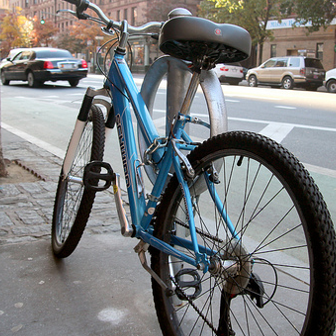

In [44]:
img = Image.open("/Users/tonyzhao/Documents/projects/omdet_v2/sample_data/val_2017_small/000000174482.jpg")
img_vis = transform_vis(img)
img_norm = transform_norm(img)
img_vis

161 tokens at the end


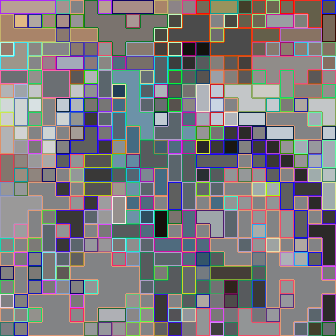

In [48]:
r = [0]*n_layers
for x in range(13):
    r[n_layers-x-1]= 32
model.r = json.loads(json.dumps(r))
_ = model(img_norm[None, ...])
source = model._tome_info["source"]

print(f"{source.shape[1]} tokens at the end")
tome.make_visualization(img_vis, source, patch_size=14, class_token=True)